In [1]:
import os
import json
import statistics
from matplotlib import pyplot as plt

In [2]:
os.chdir('./client')
print(os.getcwd())

/home/jsh/GitHub/SWCON_Project/client


In [3]:
with open('ResponseTimeResult.json') as file:
    data = json.load(file)
Linux_Python = data['OS']['Linux']['Server']['python']

languages = ['Python 3', 'JS (node)', 'curl']
####### JSON GET ################
JSON_GET = Linux_Python['resource']['json']['method']['GET']
py_json_get = JSON_GET[0][1:]
js_json_get = JSON_GET[1][1:]
curl_json_get = JSON_GET[2][1:]

json_get_best = [min(py_json_get),min(js_json_get),min(curl_json_get)]
json_get_worst = [max(py_json_get),max(js_json_get),max(curl_json_get)]
json_get_median = [statistics.median(py_json_get),statistics.median(js_json_get),statistics.median(curl_json_get)]
################################
####### JSON POST ##############
JSON_POST = Linux_Python['resource']['json']['method']['POST']
py_json_post = JSON_POST[0][1:]
js_json_post = JSON_POST[1][1:]
curl_json_post = JSON_POST[2][1:]

json_post_best = [min(py_json_post),min(js_json_post),min(curl_json_post)]
json_post_worst = [max(py_json_post),max(js_json_post),max(curl_json_post)]
json_post_median = [statistics.median(py_json_post),statistics.median(js_json_post),statistics.median(curl_json_post)]
################################
####### Calc GET ###############
Calc_GET = Linux_Python['resource']['calc']['method']['GET']
py_calc_get = Calc_GET[0][1:]
js_calc_get = Calc_GET[1][1:]
curl_calc_get = Calc_GET[2][1:]

calc_get_best = [min(py_calc_get),min(js_calc_get),min(curl_calc_get)]
calc_get_worst = [max(py_calc_get),max(js_calc_get),max(curl_calc_get)]
calc_get_median = [statistics.median(py_calc_get),statistics.median(js_calc_get),statistics.median(curl_calc_get)]
################################
####### html GET ###############
HTML_GET = Linux_Python['resource']['html']['method']['GET']
py_html_get = HTML_GET[0][1:]
js_html_get = HTML_GET[1][1:]
curl_html_get = HTML_GET[2][1:]

html_get_best = [min(py_html_get),min(js_html_get),min(curl_html_get)]
html_get_worst = [max(py_html_get),max(js_html_get),max(curl_html_get)]
html_get_median = [statistics.median(py_html_get),statistics.median(js_html_get),statistics.median(curl_html_get)]
###############################

In [4]:
def makePlot(fig,best,worst,median,title):
    fig.rcParams["figure.figsize"] = (5,4)
    width = 0.3
    
    index = [0,1,2]
    fig.barh(index,best,width)
    for i,v in enumerate(index):
        s = str(best[i])
        fig.text(best[i],v,s,horizontalalignment='left',verticalalignment='center')

    index = list(map(lambda x : x+width,index))
    fig.barh(index,worst,width )
    for i,v in enumerate(index):
        s = str(worst[i])
        fig.text(worst[i],v,s,horizontalalignment='left',verticalalignment='center')

    index = list(map(lambda x : x+width,index))
    fig.barh(index,median,width)
    for i,v in enumerate(index):
        s = str(json_get_median[i])
        fig.text(median[i],v,s,horizontalalignment='left',verticalalignment='center')

    fig.xlim(0,max(worst)+30)
    fig.yticks([0.3,1.3,2.3],languages)
    fig.ylabel('Client')
    fig.xlabel('Time (ms)')
    fig.title(title)
    fig.legend(['best','worst','median'])
    fig.show()

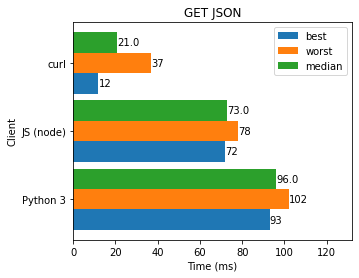

In [5]:
makePlot(plt,json_get_best,json_get_worst,json_get_median,'GET JSON')

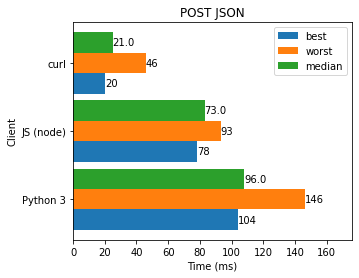

In [6]:
makePlot(plt,json_post_best,json_post_worst,json_post_median,'POST JSON')

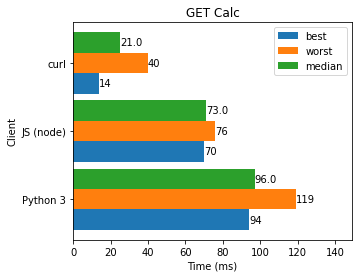

In [7]:
makePlot(plt,calc_get_best,calc_get_worst,calc_get_median,'GET Calc')

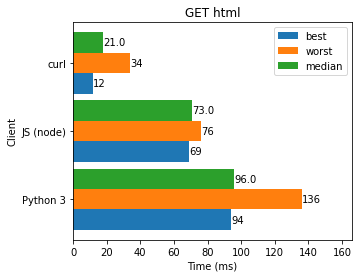

In [8]:
makePlot(plt,html_get_best,html_get_worst,html_get_median,'GET html')